In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
results = pd.read_csv('../Results/results.csv')
results

,org_dataset,dataset,scenario,xgb_score,rfc_score,knn_score
0,Titanic,Titanic_1,No Preprocessing,0.684211,0.578947,0.684211
1,Titanic,Titanic_1,Fill Missing with mean,0.744444,0.766667,0.688889
2,Titanic,Titanic_1,Fill_missing_with_min,0.766667,0.733333,0.688889
3,Titanic,Titanic_1,Fill_missing_with_max,0.700000,0.766667,0.677778
4,Titanic,Titanic_1,Regression,0.700000,0.777778,0.688889
...,...,...,...,...,...,...
94,LoL_Stats,LoL_Stats_2,Label_encoding_+_fill_missing_mean,1.000000,0.897959,0.693878
95,LoL_Stats,LoL_Stats_2,Custom_preprocessing,1.000000,0.813953,0.976744
96,LoL_Stats,LoL_Stats_3,Label_Encoding,1.000000,0.825000,0.675000
97,LoL_Stats,LoL_Stats_3,Label_encoding_+_fill_missing_mean,1.000000,0.918367,0.755102


In [60]:
results['average_score'] = sum([results['xgb_score'],results['rfc_score'],results['knn_score']])/3
results

,org_dataset,dataset,scenario,xgb_score,rfc_score,knn_score,average_score
0,Titanic,Titanic_1,No Preprocessing,0.684211,0.578947,0.684211,0.649123
1,Titanic,Titanic_1,Fill Missing with mean,0.744444,0.766667,0.688889,0.733333
2,Titanic,Titanic_1,Fill_missing_with_min,0.766667,0.733333,0.688889,0.729630
3,Titanic,Titanic_1,Fill_missing_with_max,0.700000,0.766667,0.677778,0.714815
4,Titanic,Titanic_1,Regression,0.700000,0.777778,0.688889,0.722222
...,...,...,...,...,...,...,...
94,LoL_Stats,LoL_Stats_2,Label_encoding_+_fill_missing_mean,1.000000,0.897959,0.693878,0.863946
95,LoL_Stats,LoL_Stats_2,Custom_preprocessing,1.000000,0.813953,0.976744,0.930233
96,LoL_Stats,LoL_Stats_3,Label_Encoding,1.000000,0.825000,0.675000,0.833333
97,LoL_Stats,LoL_Stats_3,Label_encoding_+_fill_missing_mean,1.000000,0.918367,0.755102,0.891156


In [61]:
results['scenario'].unique()

array(['No Preprocessing', 'Fill Missing with mean',
       'Fill_missing_with_min', 'Fill_missing_with_max', 'Regression',
       'Standardize', 'Normalizacja', 'Normalization_with_LOF',
       'Label_Encoding', 'Label_encoding_+_fill_missing_mean',
       'Custom_preprocessing'], dtype=object)

In [62]:
results['dataset'].unique()

array(['Titanic_1', 'Titanic_2', 'Titanic_3', 'Aus_weather_1',
       'Aus_weather_2', 'Aus_weather_3', 'LoL_Stats_1', 'LoL_Stats_2',
       'LoL_Stats_3'], dtype=object)

In [63]:
def get_dataset_results(dataset):
    data_res = results.loc[results['dataset'] == dataset]
    return data_res

In [64]:
titanic_1 = get_dataset_results('Titanic_1')
titanic_2 = get_dataset_results('Titanic_2')
titanic_3 = get_dataset_results('Titanic_3')

In [65]:
aus_weather_1 = get_dataset_results('Aus_weather_1')
aus_weather_2 = get_dataset_results('Aus_weather_2')
aus_weather_3 = get_dataset_results('Aus_weather_3')

In [66]:
lol_stats_1 = get_dataset_results('LoL_Stats_1')
lol_stats_2 = get_dataset_results('LoL_Stats_2')
lol_stats_3 = get_dataset_results('LoL_Stats_3')

In [67]:
def plot_1(dataset, title, filename):
    x1 = results['scenario'].unique()
    y1 = dataset['xgb_score']
    y2 = dataset['rfc_score']
    y3 = dataset['knn_score']
    plt.figure(figsize=(8,4))
    plt.xticks(rotation = 90)
    plt.plot(x1,y1, color='blue', linewidth = 3,  label = 'xgb_score')
    plt.plot(x1,y2, color='red', linewidth = 3,  label = 'rfc_score')
    plt.plot(x1,y3, color='green', linewidth = 3,  label = 'knn_score')
    plt.xlabel('Scenarios')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.savefig('../Praca/Wykresy/'+filename+'.png', bbox_inches='tight')
    plt.show()

In [68]:
def plot_2(dataset_1, dataset_2, dataset_3, title, filename):
    x1 = results['scenario'].unique()
    y1 = dataset_1['average_score']
    y2 = dataset_2['average_score']
    y3 = dataset_3['average_score']
    plt.figure(figsize=(8,4))
    plt.xticks(rotation = 90)
    plt.plot(x1,y1, color='blue', linewidth = 3,  label = dataset_1['dataset'].unique()[0])
    plt.plot(x1,y2, color='red', linewidth = 3,  label = dataset_2['dataset'].unique()[0])
    plt.plot(x1,y3, color='green', linewidth = 3,  label = dataset_3['dataset'].unique()[0])
    plt.xlabel('Scenarios')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.savefig('../Praca/Wykresy/'+filename+'.png', bbox_inches='tight')
    plt.show()

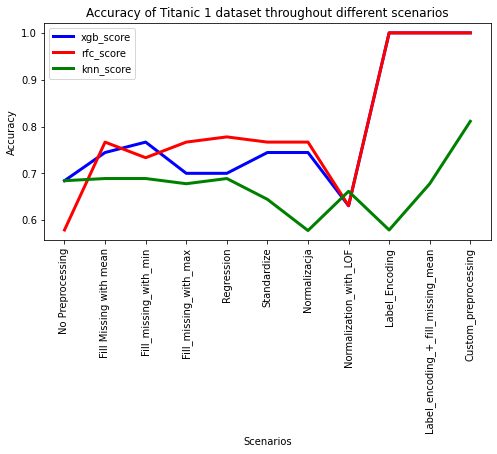

In [69]:
x1 = results['scenario'].unique()
y1 = titanic_1['xgb_score']
y2 = titanic_1['rfc_score']
y3 = titanic_1['knn_score']
plt.figure(figsize=(8,4))
plt.xticks(rotation = 90)
plt.plot(x1,y1, color='blue', linewidth = 3,  label = 'xgb_score')
plt.plot(x1,y2, color='red', linewidth = 3,  label = 'rfc_score')
plt.plot(x1,y3, color='green', linewidth = 3,  label = 'knn_score')
plt.xlabel('Scenarios')
plt.ylabel('Accuracy')
plt.title("Accuracy of Titanic 1 dataset throughout different scenarios")
plt.legend()
plt.savefig('../Praca/Wykresy/Titanic_1.png', bbox_inches='tight')
plt.show()

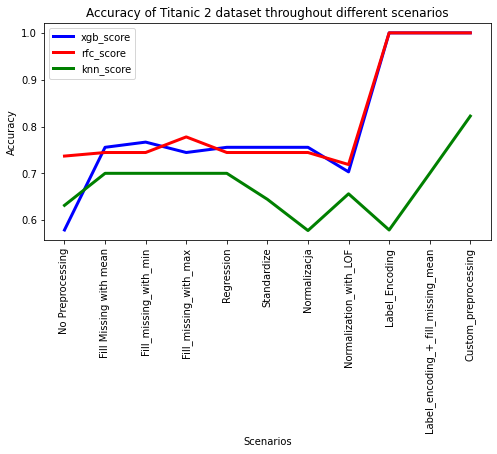

In [70]:
plot_1(titanic_2,"Accuracy of Titanic 2 dataset throughout different scenarios","Titanic_2")

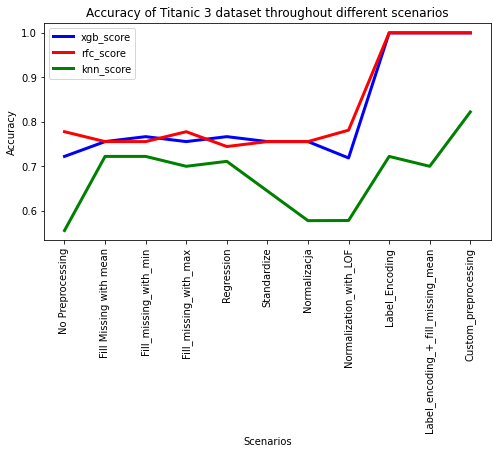

In [71]:
plot_1(titanic_3,"Accuracy of Titanic 3 dataset throughout different scenarios","Titanic_3")

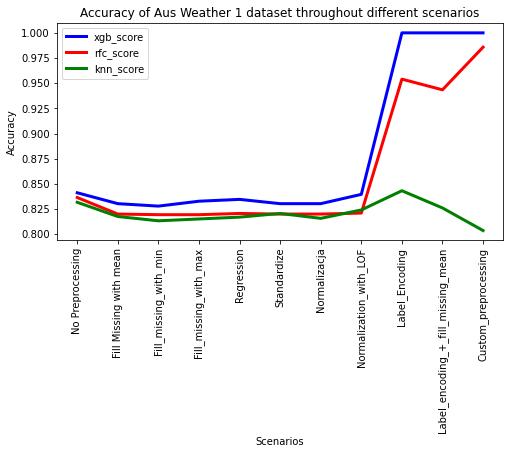

In [72]:
plot_1(aus_weather_1,"Accuracy of Aus Weather 1 dataset throughout different scenarios","Aus_Weather_1")

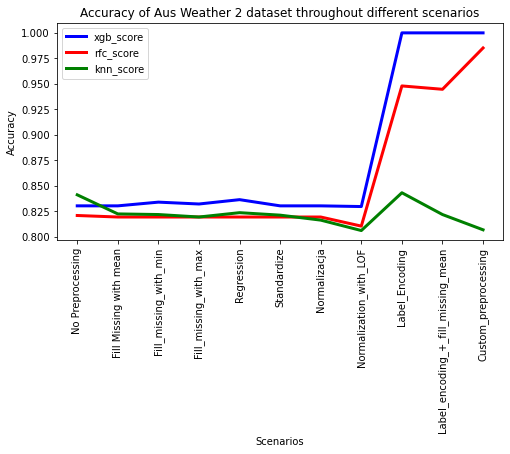

In [73]:
plot_1(aus_weather_2,"Accuracy of Aus Weather 2 dataset throughout different scenarios","Aus_Weather_2")

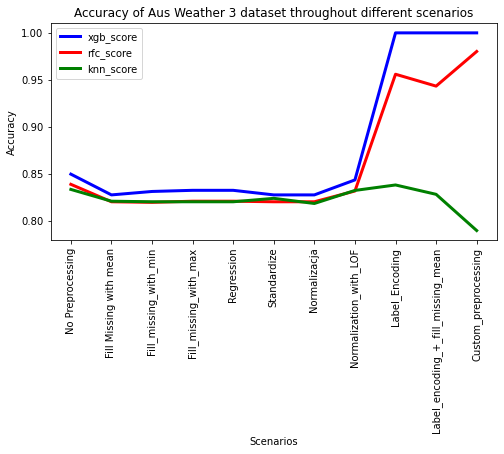

In [74]:
plot_1(aus_weather_3,"Accuracy of Aus Weather 3 dataset throughout different scenarios","Aus_Weather_3")

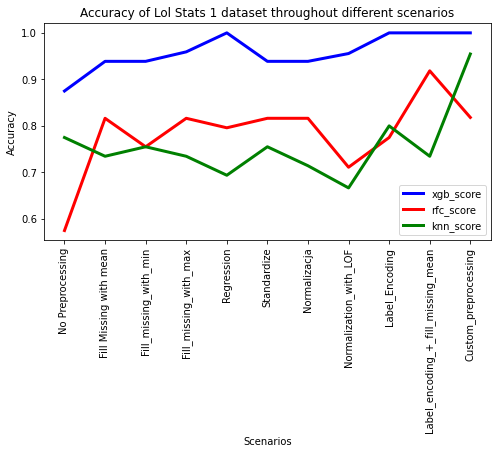

In [75]:
plot_1(lol_stats_1,"Accuracy of Lol Stats 1 dataset throughout different scenarios","Lol_Stats_1")

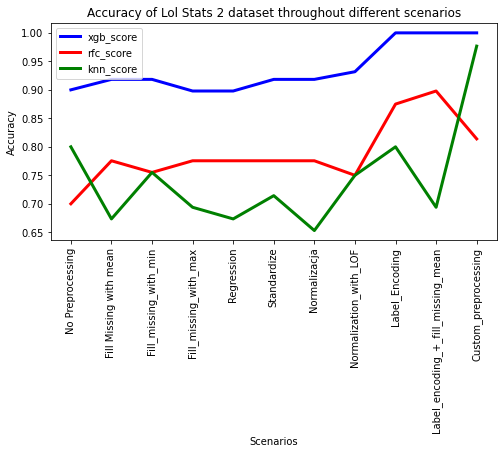

In [76]:
plot_1(lol_stats_2,"Accuracy of Lol Stats 2 dataset throughout different scenarios","Lol_Stats_2")

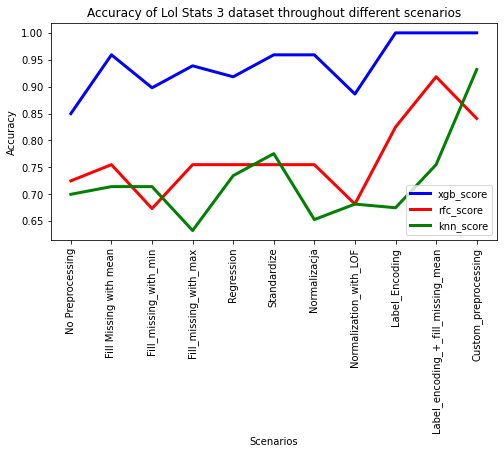

In [77]:
plot_1(lol_stats_3,"Accuracy of Lol Stats 3 dataset throughout different scenarios","Lol_Stats_3")

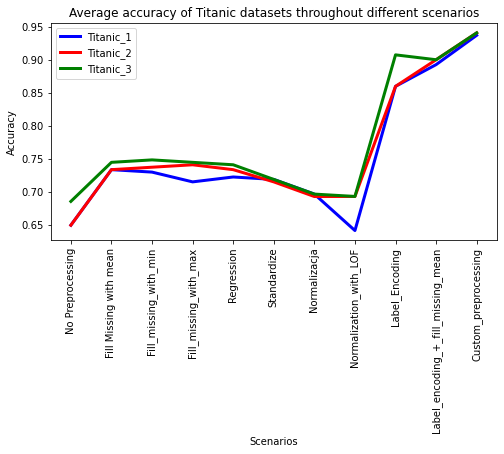

In [78]:
plot_2(titanic_1,titanic_2,titanic_3,"Average accuracy of Titanic datasets throughout different scenarios","Titanic_Avg")

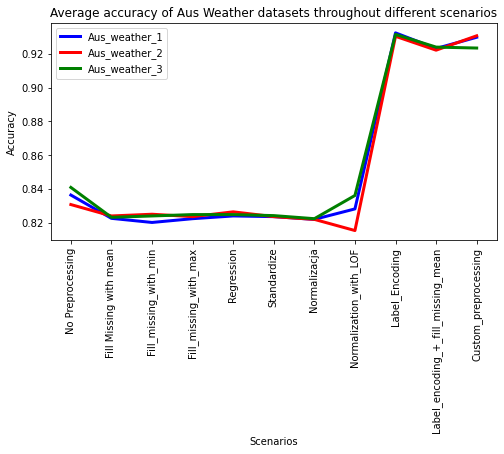

In [79]:
plot_2(aus_weather_1,aus_weather_2,aus_weather_3,"Average accuracy of Aus Weather datasets throughout different scenarios","Aus_Weather_Avg")

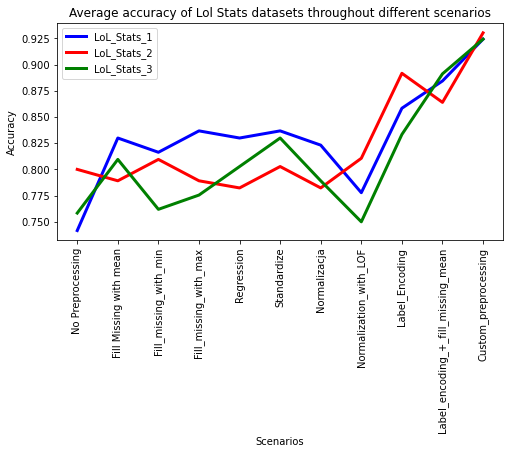

In [80]:
plot_2(lol_stats_1,lol_stats_2,lol_stats_3,"Average accuracy of Lol Stats datasets throughout different scenarios","Lol_Stats_Avg")